<a href="https://colab.research.google.com/github/urazalinuraliev/web_scraper/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import requests
# import pandas as pd
# import matplotlib.pyplot as plt
# from bs4 import BeautifulSoup as bs


# url = requests.get('https://kun.uz/uz').text
# soup = bs(url, 'html.parser').find_all("a", class_='news-lenta')

# # re = requests.get('https://kun.uz'+str(soup[0]).split()[2][6:-2]).text
# # a = bs(re, 'html.parser').select_one("div.single-content").text.split()
# # print(a)

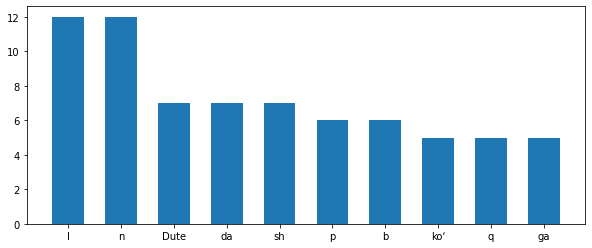

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs


url = requests.get('https://kun.uz/uz').text
soup = bs(url, 'html.parser').find_all("a", class_='news-lenta')

# re = requests.get('https://kun.uz'+str(soup[0]).split()[2][6:-2]).text
# a = bs(re, 'html.parser').select_one("div.single-content").text.split()
# print(a)
result = []
get2 = bs(requests.get('https://kun.uz'+str(soup[0]).split()[2][6:-2]).text, 'html.parser')
html = get2.find('div', class_='single-layout__center slc')
title = html.find_all('h4')
texts = html.find_all('p')

all_text = []

for i in title:
  all_text.append(i.text)

for i in texts:
  all_text.append(i.text)

all_text = ' '.join(all_text)



l  = ['“','”',', ','–','ham','. ','...','…','va','"', '2022', 'i','qilib', 'di', 'qilish','\xa0','yo‘q','bilan','degan', '/', 'men', 'man', 'sen', 'san', 'yoki', 'uchun', 'r', 'balki', '-', 'bu', 'dedi', 'asos', 'ammo', "o'sha", 'beri', 'hamda', 'edi', 'kerak', "bo'lgan", 'ham', 'foto:', 'kun.uz', "o'z", 'yil','deb', 'esa', 'shu', 'yana', 'keyin', '11']

for i in range(3):
  for j in range(len(l)):
    all_text = all_text.replace(l[j], ' ')


all_text = all_text.split()

result = {}

for i in all_text:
  result[i] = all_text.count(i)
  all_text.remove(i)


data = pd.Series(result).reset_index()

data.columns = ['sozlar', 'soni']

data = data.sort_values(by='soni', ascending=False)[:10]


plt.figure(figsize =(10, 4))
plt.bar(data['sozlar'], data['soni'], width=0.6)
plt.show()
# all_text